# **INTRODUCTION**

I have chosen Apple, Microsoft, Amazon, Google and Tesla as the 5 large-cap US companies whose stocks I will analyze for my project. The link to the dataset I will work with is attached below. I will do my project in these following steps:

1.Data Access

2.Data Cleaning

3.Data Transformation

4.Data Analysis

Link : https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

## **DATA ACCESS**

Here, I have created a data frame comprising the data of stocks of my chosen companies, with ticker being the outer index and date being the inner index. I have sorted the data in a descending manner, and converted the data in date column to DateTime format.

In [2]:
import pandas as pd
tickers = ['aapl', 'amzn', 'googl', 'msft', 'tsla']
dfs = []
for ticker in tickers:
    file_path = f"{ticker}.us.txt"
    try:
      df = pd.read_csv(file_path)
      df['ticker'] = ticker
      df['date'] = pd.to_datetime(df['Date'])
      df = df[['date', 'ticker', 'Open', 'High', 'Low', 'Close', 'Volume','OpenInt']]
      df.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume','Open Interest']
      dfs.append(df)
    except Exception as e:
      print(f"Error: {e}")

combined_df = pd.concat(dfs)
multiindex_df = combined_df.set_index(['Ticker', 'Date']).sort_index(ascending = False)
multiindex_df

Open       High        Low      Close    Volume  \
Ticker Date                                                               
tsla   2017-11-10  302.50000  308.36000  301.85000  302.99000   4621912   
       2017-11-09  302.50000  304.46000  296.30000  302.99000   5440335   
       2017-11-08  305.50000  306.89000  301.30000  304.31000   4725510   
       2017-11-07  301.02000  306.50000  300.03000  306.05000   5286320   
       2017-11-06  307.00000  307.50000  299.01000  302.78000   6482486   
...                      ...        ...        ...        ...       ...   
aapl   1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062   
       1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801   
       1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199   
       1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532   
       1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030   

                   Open Interest  
Ticker Date                       
tsla   2017-11-10              0  
       2017-11-09              0  
       2017-11-08              0  
       2017-11-07              0  
       2017-11-06              0  
...                          ...  
aapl   1984-09-13              0  
       1984-09-12              0  
       1984-09-11              0  
       1984-09-10              0  
       1984-09-07              0  

[26691 rows x 6 columns]

## **DATA CLEANING**

First, I checked for any missing rows across the tickers. Since there were none, I then looked for duplicates. I found only six duplicates, which were outside the range of the years we needed to study, so I removed them. Next, I examined the columns for any that contained only one value, as these would be redundant. I dropped those columns as well and checked for any columns with multiple data types that needed attention; there were none. Therefore, I filtered the data to include only the past 10 years and proceeded with my analysis.

In [3]:
multiindex_df.shape

(26691, 6)

In [4]:
multiindex_df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0


In [5]:
duplicate_rows = multiindex_df[multiindex_df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate rows found:
                      Open     High      Low    Close    Volume  Open Interest
Ticker Date                                                                   
msft   1986-09-16  0.07533  0.07533  0.07533  0.07533   6889952              0
       1986-07-07  0.08389  0.08389  0.07533  0.07533  18679429              0
       1986-07-03  0.08389  0.08389  0.08389  0.08389  18794263              0
       1986-05-15  0.08389  0.08389  0.08389  0.08389   5052632              0
       1986-04-24  0.07533  0.08389  0.07533  0.08389  82870827              0
       1986-04-09  0.07533  0.07533  0.07533  0.07533  16153115              0


In [6]:
multiindex_df.drop_duplicates(inplace = True)

In [7]:
for column in multiindex_df.columns:
  unique_values = multiindex_df[column].unique()
  print(f"Column '{column}': {len(unique_values)} unique values")

Column 'Open': 16297 unique values
Column 'High': 16188 unique values
Column 'Low': 16280 unique values
Column 'Close': 16651 unique values
Column 'Volume': 26120 unique values
Column 'Open Interest': 1 unique values


In [8]:
multiindex_df = multiindex_df.drop(columns=['Open Interest'])
multiindex_df

Open       High        Low      Close    Volume
Ticker Date                                                            
tsla   2017-11-10  302.50000  308.36000  301.85000  302.99000   4621912
       2017-11-09  302.50000  304.46000  296.30000  302.99000   5440335
       2017-11-08  305.50000  306.89000  301.30000  304.31000   4725510
       2017-11-07  301.02000  306.50000  300.03000  306.05000   5286320
       2017-11-06  307.00000  307.50000  299.01000  302.78000   6482486
...                      ...        ...        ...        ...       ...
aapl   1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062
       1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801
       1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199
       1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532
       1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030

[26685 rows x 5 columns]

In [9]:
def check_datatypes(df):
    print("Data types of DataFrame columns:")
    print(df.dtypes)
    if isinstance(df.index, pd.MultiIndex):
        print("\nData types of MultiIndex levels:")
        for i, level_name in enumerate(df.index.names):
            print(f"Level '{level_name}': {df.index.get_level_values(i).dtype}")
check_datatypes(multiindex_df)

Data types of DataFrame columns:
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

Data types of MultiIndex levels:
Level 'Ticker': object
Level 'Date': datetime64[ns]


In [10]:
import datetime
filtered_dfs = []
for ticker in tickers:
    try:
        df_ticker = multiindex_df.loc[ticker]
        latest_date = df_ticker.index.max()
        date_10_years_ago = latest_date - pd.DateOffset(years=10)
        df_filtered_ticker = df_ticker[(df_ticker.index <= latest_date) & (df_ticker.index >= date_10_years_ago)]
        filtered_dfs.append(df_filtered_ticker)
    except KeyError:
        print(f"Ticker '{ticker}' not found in the DataFrame index.")
    except Exception as e:
        print(f"An error occurred for ticker '{ticker}': {e}")
filtered_df = pd.concat(filtered_dfs, keys=tickers, names=['Ticker', 'Date'])
filtered_df

Open    High     Low   Close    Volume
Ticker Date                                                
aapl   2017-11-10  175.11  175.38  174.27  174.67  25130494
       2017-11-09  174.48  175.46  172.52  175.25  29533086
       2017-11-08  174.03  175.61  173.71  175.61  24451166
       2017-11-07  173.29  174.51  173.29  174.18  24424877
       2017-11-06  171.75  174.36  171.10  173.63  34901241
...                   ...     ...     ...     ...       ...
tsla   2010-07-02   23.00   23.10   18.71   19.20   5141807
       2010-07-01   25.00   25.92   20.27   21.96   8229863
       2010-06-30   25.79   30.42   23.30   23.83  17194394
       2010-06-29   19.00   25.00   17.54   23.89  18783276
       2010-06-28   17.00   17.00   17.00   17.00         0

[11934 rows x 5 columns]

In [11]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
filtered_df = remove_outliers_iqr(filtered_df, 'Close')
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10980 entries, ('aapl', Timestamp('2017-11-10 00:00:00')) to ('tsla', Timestamp('2010-06-28 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10980 non-null  float64
 1   High    10980 non-null  float64
 2   Low     10980 non-null  float64
 3   Close   10980 non-null  float64
 4   Volume  10980 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 545.6+ KB


## **DATA TRANSFORMATION**

**For each stock, I added the following columns:**

**1.  Daily Return: % change in closing price**

**2.  7-day Moving Average of closing price**

**3.  30-day Moving Average of closing price**

**4.  Rolling Volatility (30d): Standard deviation of returns over the last 30 days**

In [12]:
filtered_df = filtered_df.copy()
filtered_df_sorted = filtered_df.sort_index(level=['Ticker', 'Date'], ascending=[True, True])
filtered_df_sorted['Daily Return'] = filtered_df_sorted.groupby('Ticker')['Close'].pct_change() * 100
filtered_df_sorted

Open     High      Low    Close     Volume  Daily Return
Ticker Date                                                                   
aapl   2007-11-12   21.130   21.479   19.291   19.691  492362604           NaN
       2007-11-13   20.615   21.897   19.691   21.765  484373501     10.532731
       2007-11-14   22.733   22.739   20.970   21.274  403585172     -2.255915
       2007-11-15   21.280   21.717   20.528   21.040  414487458     -1.099934
       2007-11-16   21.193   21.388   20.405   21.309  385660112      1.278517
...                    ...      ...      ...      ...        ...           ...
tsla   2017-11-06  307.000  307.500  299.010  302.780    6482486     -1.081381
       2017-11-07  301.020  306.500  300.030  306.050    5286320      1.079992
       2017-11-08  305.500  306.890  301.300  304.310    4725510     -0.568535
       2017-11-09  302.500  304.460  296.300  302.990    5440335     -0.433768
       2017-11-10  302.500  308.360  301.850  302.990    4621912      0.000000

[10980 rows x 6 columns]

In [13]:
filtered_df_sorted['7-Day Moving Average'] = (
    filtered_df_sorted.groupby('Ticker')['Close']
    .transform(lambda x: x.rolling(window=7).mean())
)
filtered_df_sorted['30-Day Moving Average'] = (
    filtered_df_sorted.groupby('Ticker')['Close']
    .transform(lambda x: x.rolling(window=30).mean())
)
filtered_df_sorted['Rolling Volatility (30d)'] = (
    filtered_df_sorted.groupby('Ticker')['Daily Return']
    .transform(lambda x: x.rolling(window=30).std())
)
filtered_df_sorted.to_csv('stock_data.csv')
filtered_df_sorted

Open     High      Low    Close     Volume  \
Ticker Date                                                        
aapl   2007-11-12   21.130   21.479   19.291   19.691  492362604   
       2007-11-13   20.615   21.897   19.691   21.765  484373501   
       2007-11-14   22.733   22.739   20.970   21.274  403585172   
       2007-11-15   21.280   21.717   20.528   21.040  414487458   
       2007-11-16   21.193   21.388   20.405   21.309  385660112   
...                    ...      ...      ...      ...        ...   
tsla   2017-11-06  307.000  307.500  299.010  302.780    6482486   
       2017-11-07  301.020  306.500  300.030  306.050    5286320   
       2017-11-08  305.500  306.890  301.300  304.310    4725510   
       2017-11-09  302.500  304.460  296.300  302.990    5440335   
       2017-11-10  302.500  308.360  301.850  302.990    4621912   

                   Daily Return  7-Day Moving Average  30-Day Moving Average  \
Ticker Date                                                                    
aapl   2007-11-12           NaN                   NaN                    NaN   
       2007-11-13     10.532731                   NaN                    NaN   
       2007-11-14     -2.255915                   NaN                    NaN   
       2007-11-15     -1.099934                   NaN                    NaN   
       2007-11-16      1.278517                   NaN                    NaN   
...                         ...                   ...                    ...   
tsla   2017-11-06     -1.081381            314.527143             339.294800   
       2017-11-07      1.079992            312.410000             337.988133   
       2017-11-08     -0.568535            310.157143             336.766133   
       2017-11-09     -0.433768            306.080000             335.545800   
       2017-11-10      0.000000            303.495714             334.278133   

                   Rolling Volatility (30d)  
Ticker Date                                  
aapl   2007-11-12                       NaN  
       2007-11-13                       NaN  
       2007-11-14                       NaN  
       2007-11-15                       NaN  
       2007-11-16                       NaN  
...                                     ...  
tsla   2017-11-06                  2.216589  
       2017-11-07                  2.231713  
       2017-11-08                  2.226119  
       2017-11-09                  2.226150  
       2017-11-10                  2.222447  

[10980 rows x 9 columns]

In [14]:
filtered_df_sorted['Price Range'] = filtered_df_sorted['High'] - filtered_df_sorted['Low']
filtered_df_sorted['Average Price'] = (filtered_df_sorted['High'] + filtered_df_sorted['Low']) / 2
filtered_df_sorted['Volume Change'] = filtered_df_sorted.groupby('Ticker')['Volume'].pct_change() * 100
filtered_df_sorted['Range'] = filtered_df_sorted['High'] - filtered_df_sorted['Low']
filtered_df_sorted['Body'] = abs(filtered_df_sorted['Close'] - filtered_df_sorted['Open'])
filtered_df_sorted['Upper_Shadow'] = filtered_df_sorted['High'] - filtered_df_sorted[['Close', 'Open']].max(axis=1)
filtered_df_sorted['Lower_Shadow'] = filtered_df_sorted[['Close', 'Open']].min(axis=1) - filtered_df_sorted['Low']
filtered_df_sorted['Cumulative_Return'] = (1 + filtered_df_sorted['Close'].pct_change()).cumprod()
filtered_df_sorted['Volume_Change'] = filtered_df_sorted['Volume'].pct_change()
filtered_df_sorted['Volume_MA_5'] = filtered_df_sorted['Volume'].rolling(5).mean()
filtered_df_sorted['Volume_to_Average'] = filtered_df_sorted['Volume'] / filtered_df_sorted['Volume_MA_5']
def RSI(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))
filtered_df_sorted['RSI_14'] = RSI(filtered_df_sorted['Close'])
filtered_df_sorted['EMA_12'] = filtered_df_sorted['Close'].ewm(span=12).mean()
filtered_df_sorted['EMA_26'] = filtered_df_sorted['Close'].ewm(span=26).mean()
filtered_df_sorted['MACD'] = filtered_df_sorted['EMA_12'] - filtered_df_sorted['EMA_26']
filtered_df_sorted['Close_Lag1'] = filtered_df_sorted['Close'].shift(1)
filtered_df_sorted['Close_Lag2'] = filtered_df_sorted['Close'].shift(2)
filtered_df_sorted['Return_1D'] = filtered_df_sorted['Close'].pct_change(1)
filtered_df_sorted['Return_5D'] = filtered_df_sorted['Close'].pct_change(5)
filtered_df_sorted['MA_5'] = filtered_df_sorted['Close'].rolling(window=5).mean()
filtered_df_sorted['MA_10'] = filtered_df_sorted['Close'].rolling(window=10).mean()
filtered_df_sorted['MA_20'] = filtered_df_sorted['Close'].rolling(window=20).mean()
filtered_df_sorted['MA_diff'] = filtered_df_sorted['MA_5'] - filtered_df_sorted['MA_10']

In [15]:
cols = [col for col in filtered_df_sorted.columns if col != 'Close'] + ['Close']
filtered_df_sorted = filtered_df_sorted[cols]
filtered_df_sorted

Open     High      Low     Volume  Daily Return  \
Ticker Date                                                             
aapl   2007-11-12   21.130   21.479   19.291  492362604           NaN   
       2007-11-13   20.615   21.897   19.691  484373501     10.532731   
       2007-11-14   22.733   22.739   20.970  403585172     -2.255915   
       2007-11-15   21.280   21.717   20.528  414487458     -1.099934   
       2007-11-16   21.193   21.388   20.405  385660112      1.278517   
...                    ...      ...      ...        ...           ...   
tsla   2017-11-06  307.000  307.500  299.010    6482486     -1.081381   
       2017-11-07  301.020  306.500  300.030    5286320      1.079992   
       2017-11-08  305.500  306.890  301.300    4725510     -0.568535   
       2017-11-09  302.500  304.460  296.300    5440335     -0.433768   
       2017-11-10  302.500  308.360  301.850    4621912      0.000000   

                   7-Day Moving Average  30-Day Moving Average  \
Ticker Date                                                      
aapl   2007-11-12                   NaN                    NaN   
       2007-11-13                   NaN                    NaN   
       2007-11-14                   NaN                    NaN   
       2007-11-15                   NaN                    NaN   
       2007-11-16                   NaN                    NaN   
...                                 ...                    ...   
tsla   2017-11-06            314.527143             339.294800   
       2017-11-07            312.410000             337.988133   
       2017-11-08            310.157143             336.766133   
       2017-11-09            306.080000             335.545800   
       2017-11-10            303.495714             334.278133   

                   Rolling Volatility (30d)  Price Range  Average Price  ...  \
Ticker Date                                                              ...   
aapl   2007-11-12                       NaN        2.188        20.3850  ...   
       2007-11-13                       NaN        2.206        20.7940  ...   
       2007-11-14                       NaN        1.769        21.8545  ...   
       2007-11-15                       NaN        1.189        21.1225  ...   
       2007-11-16                       NaN        0.983        20.8965  ...   
...                                     ...          ...            ...  ...   
tsla   2017-11-06                  2.216589        8.490       303.2550  ...   
       2017-11-07                  2.231713        6.470       303.2650  ...   
       2017-11-08                  2.226119        5.590       304.0950  ...   
       2017-11-09                  2.226150        8.160       300.3800  ...   
       2017-11-10                  2.222447        6.510       305.1050  ...   

                        MACD  Close_Lag1  Close_Lag2  Return_1D  Return_5D  \
Ticker Date                                                                  
aapl   2007-11-12   0.000000         NaN         NaN        NaN        NaN   
       2007-11-13   0.046532      19.691         NaN   0.105327        NaN   
       2007-11-14   0.044065      21.765      19.691  -0.022559        NaN   
       2007-11-15   0.033415      21.274      21.765  -0.010999        NaN   
       2007-11-16   0.037628      21.040      21.274   0.012785        NaN   
...                      ...         ...         ...        ...        ...   
tsla   2017-11-06 -11.999531     306.090     299.260  -0.010814  -0.054049   
       2017-11-07 -12.311572     302.780     306.090   0.010800  -0.076856   
       2017-11-08 -12.554550     306.050     302.780  -0.005685  -0.052230   
       2017-11-09 -12.707144     304.310     306.050  -0.004338   0.012464   
       2017-11-10 -12.681887     302.990     304.310   0.000000  -0.010128   

                       MA_5    MA_10     MA_20  MA_diff    Close  
Ticker Date                                                       
aapl   2007-11-12      

## **EXPLORATORY ANALYSIS**

Finally I answered the following questions:

1.   Which stock had the highest average return over the 10-year period?
2.   Which stock had the most volatile month, and when?

In [16]:
average_returns = filtered_df_sorted.groupby('Ticker')['Daily Return'].mean()
highest_avg_return_stock = average_returns.idxmax()
print(f"The stock with the highest average return over the 10-year period is: {highest_avg_return_stock}")
print(f"Average returns:\n{average_returns}")

The stock with the highest average return over the 10-year period is: tsla
Average returns:
Ticker
aapl     0.106375
amzn     0.134835
googl    0.056440
msft     0.058938
tsla     0.210083
Name: Daily Return, dtype: float64


In [17]:
volatility_unstacked = filtered_df_sorted['Rolling Volatility (30d)'].unstack(level='Ticker')
monthly_volatility = volatility_unstacked.resample('M').mean()
average_monthly_volatility_across_tickers = monthly_volatility.mean(axis=1)
most_volatile_month_date = average_monthly_volatility_across_tickers.idxmax()
volatility_in_most_volatile_month = monthly_volatility.loc[most_volatile_month_date]
most_volatile_stock_in_month = volatility_in_most_volatile_month.dropna().idxmax()
print(f"\nThe stock with the most volatile month was {most_volatile_stock_in_month}.")
print(f"This occurred in {most_volatile_month_date.strftime('%B %Y')}.")
print(f"The average rolling volatility across all stocks in that month was: {average_monthly_volatility_across_tickers.max():.2f}")
print(f"The rolling volatility of {most_volatile_stock_in_month} in that month was: {volatility_in_most_volatile_month.max():.2f}")


The stock with the most volatile month was amzn.
This occurred in November 2008.
The average rolling volatility across all stocks in that month was: 5.72
The rolling volatility of amzn in that month was: 6.45


<ipython-input-17-b539d1488a9b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = volatility_unstacked.resample('M').mean()


Daily Returns are calculated under the assumption that markets are liquid (no gaps between closing prices), and Rolling Volatility assumes returns are normally distributed over 30-day windows. This analysis does not account for dividend payments, stock splits, or after-hours trading, which may affect return calculations.

After performing exploratory analysis on the given data, I have found out that:


1.   The stock with the highest average return over the 10 year period was TSLA.
2.   The stock which had the most volatile month was AMZN during November in the year 2008.

## **DATA VISUALISATIONS**

While this analysis focuses on quantitative metrics, visualizations (e.g., moving average trends or volatility time series) could further illustrate patterns like Tesla's consistent outperformance or Amazon's volatility spikes during the 2008 financial crisis. Thus, I have provided some visual representations to explain the above patterns in this section, to make my explanations and assessments of the given data clear, and to ease the understanding of the data to the reader. I have also analyzed other stuff like the correlation matrix and skewness of the close column.

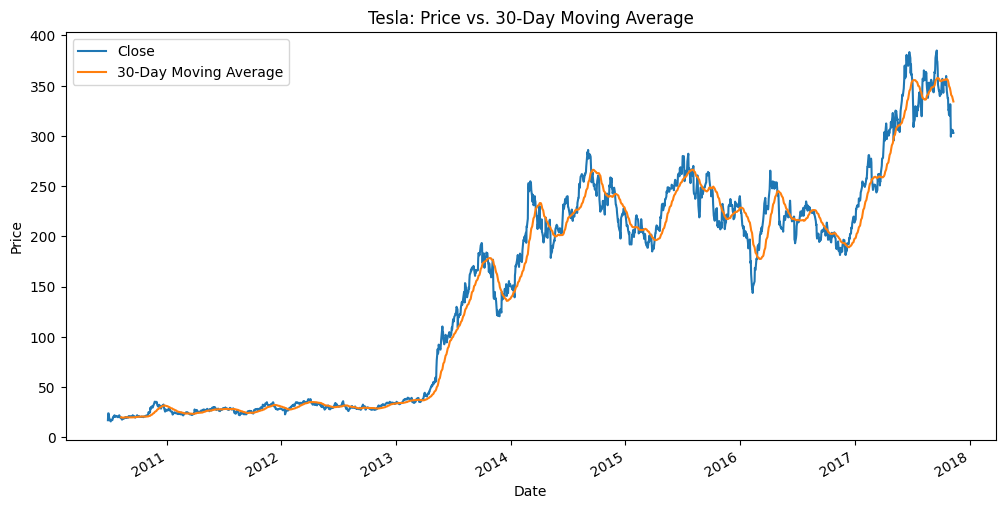

In [18]:
import matplotlib.pyplot as plt
tsla_data = filtered_df_sorted.loc['tsla']
tsla_data.plot(y=['Close', '30-Day Moving Average'], figsize=(12, 6))
plt.title('Tesla: Price vs. 30-Day Moving Average')
plt.ylabel('Price')
plt.show()

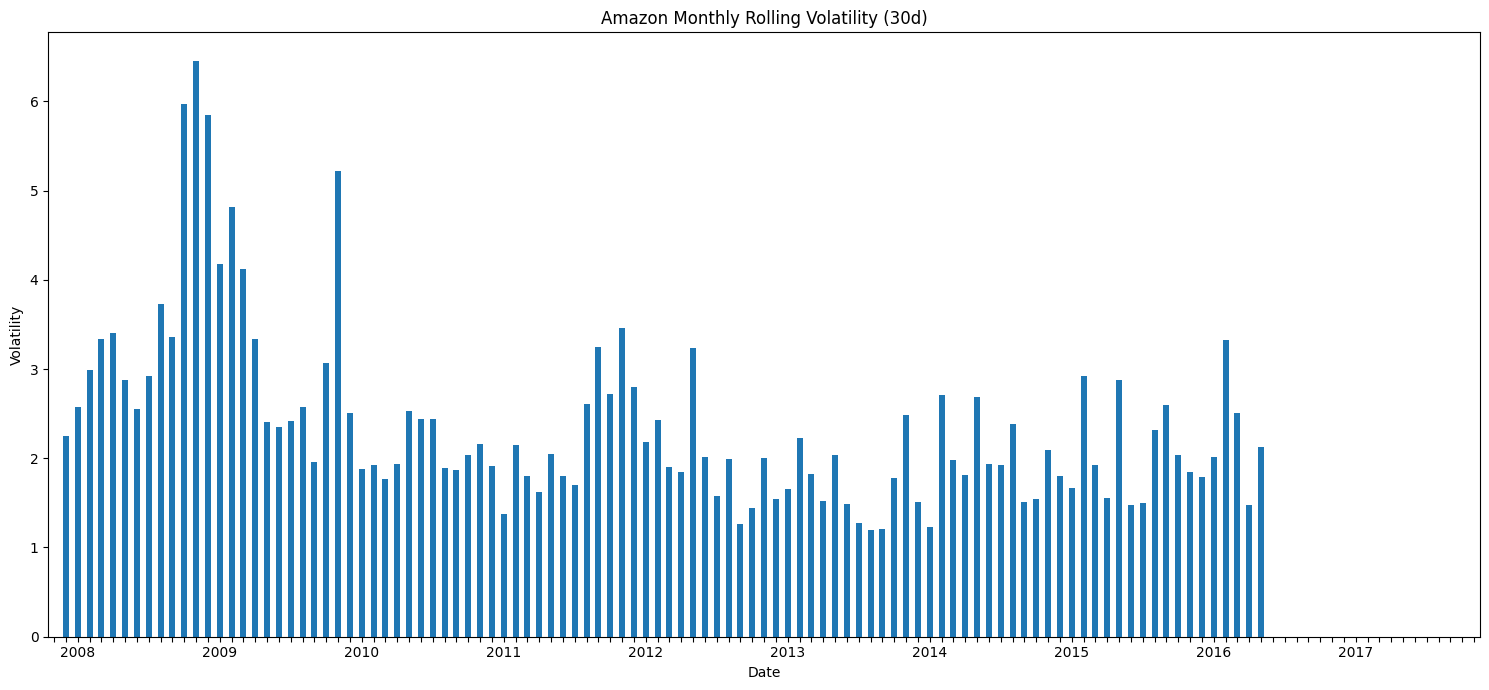

In [19]:
amzn_monthly_volatility = monthly_volatility['amzn']
plt.figure(figsize=(15, 7))
amzn_monthly_volatility.plot(kind='bar')
plt.title('Amazon Monthly Rolling Volatility (30d)')
plt.xlabel('Date')
plt.ylabel('Volatility')
labels = [date.strftime('%Y') if date.month == 1 else '' for date in amzn_monthly_volatility.index]
plt.xticks(range(len(amzn_monthly_volatility.index)), labels, rotation=0)
plt.tight_layout()
plt.show()

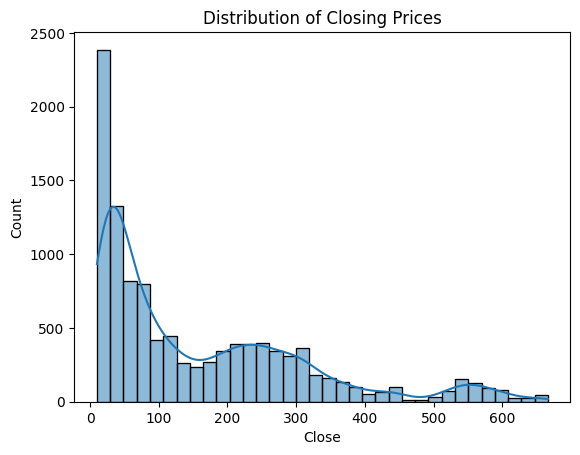

Skewness of Close: 1.2503958690928683


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Close' prices using filtered_df_sorted
sns.histplot(filtered_df_sorted['Close'], kde=True)
plt.title("Distribution of Closing Prices")
plt.show()

# Calculate and print the skewness of the 'Close' prices using filtered_df_sorted
from scipy.stats import skew
print("Skewness of Close:", skew(filtered_df_sorted['Close']))

In [21]:
print("\nCorrelation with 'Close':")
print(filtered_df_sorted.corr()['Close'].sort_values(ascending=False))


Correlation with 'Close':
Cumulative_Return           1.000000
Close                       1.000000
Average Price               0.999930
Low                         0.999892
High                        0.999882
Open                        0.999762
7-Day Moving Average        0.999297
Close_Lag1                  0.998575
MA_5                        0.998373
Close_Lag2                  0.997205
EMA_12                      0.996651
30-Day Moving Average       0.996492
MA_10                       0.996213
EMA_26                      0.992216
MA_20                       0.991807
Range                       0.732406
Price Range                 0.732406
Body                        0.550928
Lower_Shadow                0.550354
Upper_Shadow                0.511834
MACD                        0.157951
MA_diff                     0.069641
RSI_14                      0.036407
Return_5D                   0.024812
Return_1D                   0.010553
Daily Return                0.007181
Volume_to_A

## **MODEL IMPLEMENTATION AND EVALUATION**

### **CHOOSING A STOCK**

> I will choose AAPL as the sample stock from the dataset.



In [22]:
features = ['Open', 'High', 'Low', 'Volume', 'RSI_14', 'MACD', 'Return_1D', 'Close']
aapl_df = filtered_df_sorted[features].loc['aapl'].copy()

### **DATA SPLITTING**

> I will split the data into the training (first 80%) and testing (last 20%) sets, ensuring the split respects the time order.



In [23]:
aapl_df.dropna(inplace=True)
train_size = int(len(aapl_df) * 0.8)
train_df, test_df = aapl_df.iloc[:train_size], aapl_df.iloc[train_size:]
target = 'Close'
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

### **MODEL IMPLEMENTATION AND EVALUATION**

> I will implement 3 models, Linear Regression, ARIMA and Random Forest and evaluate them. Evaluation will be done using Mean Absolute Error (MAE) and accuracy for direction prediction (whether the price goes up or down).

LINEAR REGRESSION

> I will predict the next day's closing price using the past 5 days' closing prices as features.

In [24]:
from sklearn.preprocessing import MinMaxScaler
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train[features])
X_test_scaled = X_scaler.transform(X_test[features])
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)
lr_predictions_scaled = lr_model.predict(X_test_scaled)
lr_predictions = y_scaler.inverse_transform(lr_predictions_scaled.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()
lr_mae = mean_absolute_error(y_test_original, lr_predictions)
print(f"Linear Regression MAE: {lr_mae:.4f}")
actual_direction = np.sign(test_df['Close'].diff().dropna())
predicted_direction = np.sign(pd.Series(lr_predictions).diff().dropna())
aligned_actual_direction = actual_direction
aligned_predicted_direction = predicted_direction.set_axis(aligned_actual_direction.index)
correct_direction_predictions = np.sum(aligned_actual_direction == aligned_predicted_direction)
total_direction_predictions = len(aligned_actual_direction)
lr_direction_accuracy = correct_direction_predictions / total_direction_predictions
print(f"Linear Regression Direction Prediction Accuracy: {lr_direction_accuracy:.4f}")

Linear Regression MAE: 0.0000
Linear Regression Direction Prediction Accuracy: 1.0000


ARIMA

> I will forecast the closing price using an ARIMA model.

In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.26.4 pmdarima

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
from pmdarima import auto_arima
arima_train_data = train_df['Close']
arima_test_data = test_df['Close']
arima_model = auto_arima(arima_train_data, seasonal=False, stepwise=True, suppress_warnings=True)
print("Best ARIMA parameters:", arima_model.order)
arima_model.fit(arima_train_data)
start_index = len(arima_train_data)
end_index = len(arima_train_data) + len(arima_test_data) - 1
arima_predictions = arima_model.predict(n_periods=len(arima_test_data))
arima_mae = mean_absolute_error(arima_test_data, arima_predictions)
print(f"ARIMA MAE: {arima_mae:.4f}")
actual_direction_arima = np.sign(arima_test_data.diff().dropna())
predicted_direction_arima = np.sign(pd.Series(arima_predictions, index=arima_test_data.index).diff().dropna())
aligned_predicted_direction_arima = predicted_direction_arima.set_axis(actual_direction_arima.index)
correct_direction_predictions_arima = np.sum(actual_direction_arima == aligned_predicted_direction_arima)
total_direction_predictions_arima = len(actual_direction_arima)
arima_direction_accuracy = correct_direction_predictions_arima / total_direction_predictions_arima
print(f"ARIMA Direction Prediction Accuracy: {arima_direction_accuracy:.4f}")

RANDOM FOREST

> I will predict the closing price using technical indicators (e.g., 7-day and 30-day moving averages, RSI) as features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)
rf_predictions_scaled = rf_model.predict(X_test_scaled)
rf_predictions = scaler.inverse_transform(rf_predictions_scaled.reshape(-1, 1)).flatten()
rf_mae = mean_absolute_error(y_test_original, rf_predictions)
print(f"Random Forest MAE: {rf_mae:.4f}")
actual_direction_rf = np.sign(pd.Series(y_test_original).diff().dropna())
predicted_direction_rf = np.sign(pd.Series(rf_predictions).diff().dropna())
aligned_predicted_direction_rf = predicted_direction_rf.reindex(actual_direction_rf.index)
correct_direction_predictions_rf = np.sum(actual_direction_rf == aligned_predicted_direction_rf)
total_direction_predictions_rf = len(actual_direction_rf)
rf_direction_accuracy = correct_direction_predictions_rf / total_direction_predictions_rf
print(f"Random Forest Direction Prediction Accuracy: {rf_direction_accuracy:.4f}")

### **MODEL COMPARISON**

> Based on the previous data, I will compare the models based on MAE and identify the best-performing one. Then I will save it for backtesting.

In [ ]:
print("Model Comparison (MAE):")
print(f"Linear Regression MAE: {lr_mae:.4f}")
print(f"Random Forest MAE: {rf_mae:.4f}")
print("\nModel Comparison (Direction Prediction Accuracy):")
print(f"Linear Regression Direction Prediction Accuracy: {lr_direction_accuracy:.4f}")
print(f"Random Forest Direction Prediction Accuracy: {rf_direction_accuracy:.4f}")
best_model_mae = "Linear Regression" if lr_mae < rf_mae else "Random Forest"
print(f"\nBest model based on MAE: {best_model_mae}")
best_model_accuracy = "Linear Regression" if lr_direction_accuracy > rf_direction_accuracy else "Random Forest"
print(f"Best model based on Direction Prediction Accuracy: {best_model_accuracy}")
best_model = lr_model if lr_direction_accuracy > rf_direction_accuracy else rf_model
print(f"\nProceeding with the {best_model_accuracy} model for backtesting.")

### **BACKTESTING THE BEST MODEL**

> Using the best model, I will generate buy/sell signals; buy Generate buy/sell signals: Buy if the predicted price > current price, sell otherwise.
I will also Calculate the hypothetical profit/loss over the test period.

In [ ]:
test_df_with_predictions = test_df.copy()
test_df_with_predictions['Predicted_Close'] = lr_predictions
test_df_with_predictions['Signal'] = 0
test_df_with_predictions['Signal'][test_df_with_predictions['Predicted_Close'].shift(-1) > test_df_with_predictions['Close']] = 1
test_df_with_predictions['Signal'][test_df_with_predictions['Predicted_Close'].shift(-1) < test_df_with_predictions['Close']] = -1
initial_capital = 100000
position = 0
portfolio_value = initial_capital
buy_price = 0
sell_price = 0
profits = []
for i in range(len(test_df_with_predictions) - 1):
    if test_df_with_predictions['Signal'].iloc[i] == 1 and position == 0:
        buy_price = test_df_with_predictions['Close'].iloc[i]
        position = 1
    elif test_df_with_predictions['Signal'].iloc[i] == -1 and position == 1:
        sell_price = test_df_with_predictions['Close'].iloc[i]
        profit = sell_price - buy_price
        profits.append(profit)
        portfolio_value += profit
        position = 0
if position == 1:
    sell_price = test_df_with_predictions['Close'].iloc[-1]
    profit = sell_price - buy_price
    profits.append(profit)
    portfolio_value += profit
    position = 0
total_profit_loss = sum(profits)
final_portfolio_value = initial_capital + total_profit_loss
print(f"\nInitial Capital: ${initial_capital:.2f}")
print(f"Total Profit/Loss over the test period: ${total_profit_loss:.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")